# Case: Depression Disorder and Its Factors

This project explores depressive disorder as a multifactorial condition, influenced by a wide range of social, behavioral, and health-related factors. Using data from the NHANES (National Health and Nutrition Examination Survey) 2005–2006, the analysis aims to uncover insights about the U.S. adult population (18 years and older) experiencing depressive symptoms.

* Objectives
    * Identify the profile of individuals with depressive symptoms in the United States during the 2005–2006 period.
    * Investigate lifestyle associations, focusing on whether healthy eating habits and physical activity are linked to lower levels of depression within this population.

* Why This Study?

Depression is one of the leading global health concerns, often connected to complex and interacting factors such as nutrition, physical activity, socioeconomic conditions, and general well-being. By leveraging public health data, this project highlights important patterns that may guide future preventive and supportive interventions.

## Library Imports

In [1]:
# Data manipulation
import warnings
import pandas as pd
import numpy as np

# Warning control
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Database Configuration

In [2]:
demo_path = 'https://raw.githubusercontent.com/Tamireees/Case-Depression-Disorder-and-Its-Factors/refs/heads/main/data/DEMO_PHQ.csv'
demo_df = pd.read_csv(demo_path, sep=',')
demo_df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [3]:
pag_hei_path = 'https://raw.githubusercontent.com/Tamireees/Case-Depression-Disorder-and-Its-Factors/refs/heads/main/data/PAG_HEI.csv'
pag_hei_df = pd.read_csv(pag_hei_path, sep=',')
pag_hei_df.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


# Data Analysis Steps

### **Data Cleaning**

In [4]:
# Merging demo_df and pag_hei_df on SEQN, keeping only matching participants:
data= demo_df.merge(pag_hei_df, on='SEQN', how='inner')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [6]:
data.shape

(5334, 31)

In [7]:
data['SEQN'].duplicated().sum()

0

In [8]:
data.isnull().sum()

SEQN                          0
DPQ010                      498
DPQ020                      498
DPQ030                      498
DPQ040                      498
DPQ050                      498
DPQ060                      498
DPQ070                      498
DPQ080                      498
DPQ090                      498
RIAGENDR                      0
RIDAGEYR                      0
RIDRETH1                      0
DMDEDUC                       0
INDFMINC                     47
PAG_MINW                      0
ADHERENCE                     0
HEI2015C1_TOTALVEG          274
HEI2015C2_GREEN_AND_BEAN    274
HEI2015C3_TOTALFRUIT        274
HEI2015C4_WHOLEFRUIT        274
HEI2015C5_WHOLEGRAIN        274
HEI2015C6_TOTALDAIRY        274
HEI2015C7_TOTPROT           274
HEI2015C8_SEAPLANT_PROT     274
HEI2015C9_FATTYACID         274
HEI2015C10_SODIUM           274
HEI2015C11_REFINEDGRAIN     274
HEI2015C12_SFAT             274
HEI2015C13_ADDSUG           274
HEI2015_TOTAL_SCORE         274
dtype: i

* *I excluded participants who skipped the entire depression questionnaire (DPQ010–DPQ090) or had missing values in all Healthy Eating Index (HEI2015) variables, since both constructs are essential for the analyses.*

In [9]:
# Define the list of depression-related variables (PHQ-9 items)
dpq_cols = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050',
            'DPQ060','DPQ070','DPQ080','DPQ090']
# Define the list of Healthy Eating Index variables
hei_cols = ['HEI2015C1_TOTALVEG','HEI2015C2_GREEN_AND_BEAN','HEI2015C3_TOTALFRUIT',
            'HEI2015C4_WHOLEFRUIT','HEI2015C5_WHOLEGRAIN','HEI2015C6_TOTALDAIRY',
            'HEI2015C7_TOTPROT','HEI2015C8_SEAPLANT_PROT','HEI2015C9_FATTYACID',
            'HEI2015C10_SODIUM','HEI2015C11_REFINEDGRAIN','HEI2015C12_SFAT',
            'HEI2015C13_ADDSUG','HEI2015_TOTAL_SCORE']



In [10]:
# Select participants who have missing values in all questions:
mask_exclude = (
    data[dpq_cols].isna().all(axis=1) |
    data[hei_cols].isna().all(axis=1)
)

# Remove those participants from the dataset:
data_clean = data.loc[~mask_exclude].copy()
print("Original:", data.shape, "Clean:", data_clean.shape, "Removed:", mask_exclude.sum())


Original: (5334, 31) Clean: (4737, 31) Removed: 597


* *I replaced missing values in the variable INDFMINC with the value 99 to indicate non-response.*

In [11]:
data_clean['INDFMINC'] = data_clean['INDFMINC'].fillna(99)

* *Creating the variable phq9 by summing DPQ010 to DPQ090, which gives the total PHQ-9 depression score.*

In [12]:
data_clean['phq9'] = data_clean[dpq_cols].sum(axis=1)


* *Creating the variable phq_grp to classify participants into three groups: 0 (no symptoms, PHQ-9 < 5), 1 (mild symptoms, 5 ≤ PHQ-9 < 10), and 2 (moderate to severe symptoms, PHQ-9 ≥ 10)*

In [13]:
conditions = [
    data_clean['phq9'] < 5,
    (data_clean['phq9'] >= 5) & 
    (data_clean['phq9'] < 10),
    data_clean['phq9'] >= 10
]

choices = [0, 1, 2]

data_clean['phq_grp'] = np.select(conditions, choices)

In [14]:
data_clean.to_csv(r"C:\Users\tamir\OneDrive\Área de Trabalho\Case Depressão\exports\data_clean.csv", index=False)

### **Univariate Exploratory Data Analysis (EDA)**

| Variable                  | Type                      | Notes                                                                            |
| ------------------------- | ------------------------- | -------------------------------------------------------------------------------- |
| **SEQN**                  | Identifier                | Participant ID (not used in statistical analysis)                                |
| **DPQ010–DPQ090**         | Categorical (Ordinal)     | Depression questionnaire items (0–3 frequency scale, plus codes 7/9 for missing) |
| **RIAGENDR**              | Categorical (Nominal)     | Gender (2 categories: Male/Female)                                               |
| **RIDAGEYR**              | Quantitative (Discrete)   | Age in years                                                                     |
| **RIDRETH1**              | Categorical (Nominal)     | Race/Ethnicity (5 categories)                                                    |
| **DMDEDUC**               | Categorical (Ordinal)     | Education level (7 categories, ordered)                                          |
| **INDFMINC**              | Categorical (Ordinal)     | Family income categories (15 levels, ordered)                                    |
| **PAG\_MINW**             | Quantitative (Continuous) | Minutes of physical activity per week                                            |
| **ADHERENCE**             | Categorical (Ordinal)     | Adherence level (3 categories, ordered)                                          |
| **HEI2015C1–C13**         | Quantitative (Continuous) | Healthy Eating Index component scores                                            |
| **HEI2015\_TOTAL\_SCORE** | Quantitative (Continuous) | Overall HEI score (0–100)                                                        |
| **phq9**                  | Quantitative (Discrete)   | PHQ-9 total score (0–27)                                                         |
| **phq\_grp**              | Categorical (Ordinal)     | Depression severity groups: 0 = none, 1 = mild, 2 = moderate/severe              |



* *For quantitative variables, I applied measures of central tendency and dispersion, and used visualizations such as histograms and density plots*

In [15]:
Quantitative = data_clean[[
    'RIDAGEYR',
    'HEI2015C1_TOTALVEG',
    'HEI2015C2_GREEN_AND_BEAN',
    'HEI2015C3_TOTALFRUIT',
    'HEI2015C4_WHOLEFRUIT', 
    'HEI2015C5_WHOLEGRAIN',
    'HEI2015C6_TOTALDAIRY',
    'HEI2015C7_TOTPROT',
    'HEI2015C8_SEAPLANT_PROT',
    'HEI2015C9_FATTYACID',
    'HEI2015C10_SODIUM', 
    'HEI2015C11_REFINEDGRAIN',
    'HEI2015C12_SFAT',
    'HEI2015C13_ADDSUG',
    'HEI2015_TOTAL_SCORE',
    'phq9',
    'PAG_MINW'    
]]



In [16]:
Quantitative.describe().T

,count,mean,std,min,25%,50%,75%,max
RIDAGEYR,4737.0,44.843150,19.851180,18.000000,27.000000,43.000000,61.000000,85.000000
HEI2015C1_TOTALVEG,4737.0,3.202517,1.460227,0.000000,2.064762,3.209060,4.796827,5.000000
HEI2015C2_GREEN_AND_BEAN,4737.0,1.794534,2.134834,0.000000,0.000000,0.041508,4.435851,5.000000
HEI2015C3_TOTALFRUIT,4737.0,2.489617,1.949546,0.000000,0.448681,2.318754,4.938134,5.000000
HEI2015C4_WHOLEFRUIT,4737.0,2.364610,2.171624,0.000000,0.000000,2.087721,5.000000,5.000000
HEI2015C5_WHOLEGRAIN,4737.0,1.770618,1.911844,0.000000,0.000000,1.038915,3.397186,5.000000
HEI2015C6_TOTALDAIRY,4737.0,3.769826,1.593342,0.000000,2.622205,4.944149,5.000000,5.000000
HEI2015C7_TOTPROT,4737.0,4.432712,1.006482,0.000000,4.164134,5.000000,5.000000,5.000000
HEI2015C8_SEAPLANT_PROT,4737.0,2.586972,2.169018,0.000000,0.000000,2.571318,5.000000,5.000000
HEI2015C9_FATTYACID,4737.0,4.700483,3.234156,0.000000,2.002189,4.429780,7.248504,10.000000


In [17]:
"""
# Mínimo e Máximo
min_val = Quantitative['RIDAGEYR'].min()
max_val = Quantitative['RIDAGEYR'].max()

# Variância
variance = Quantitative['RIDAGEYR'].var()

# Desvio padrão
std_dev = Quantitative['RIDAGEYR'].std()

# Quartis
q1 = Quantitative['RIDAGEYR'].quantile(0.25)
q3 = Quantitative['RIDAGEYR'].quantile(0.75)
iqr = q3 - q1

print("Min:", min_val, "Max:", max_val)
print("Variance:", variance, "Std Dev:", std_dev)
print("Q1:", q1, "Q3:", q3, "IQR:", iqr)
"""

'\n# Mínimo e Máximo\nmin_val = Quantitative[\'RIDAGEYR\'].min()\nmax_val = Quantitative[\'RIDAGEYR\'].max()\n\n# Variância\nvariance = Quantitative[\'RIDAGEYR\'].var()\n\n# Desvio padrão\nstd_dev = Quantitative[\'RIDAGEYR\'].std()\n\n# Quartis\nq1 = Quantitative[\'RIDAGEYR\'].quantile(0.25)\nq3 = Quantitative[\'RIDAGEYR\'].quantile(0.75)\niqr = q3 - q1\n\nprint("Min:", min_val, "Max:", max_val)\nprint("Variance:", variance, "Std Dev:", std_dev)\nprint("Q1:", q1, "Q3:", q3, "IQR:", iqr)\n'

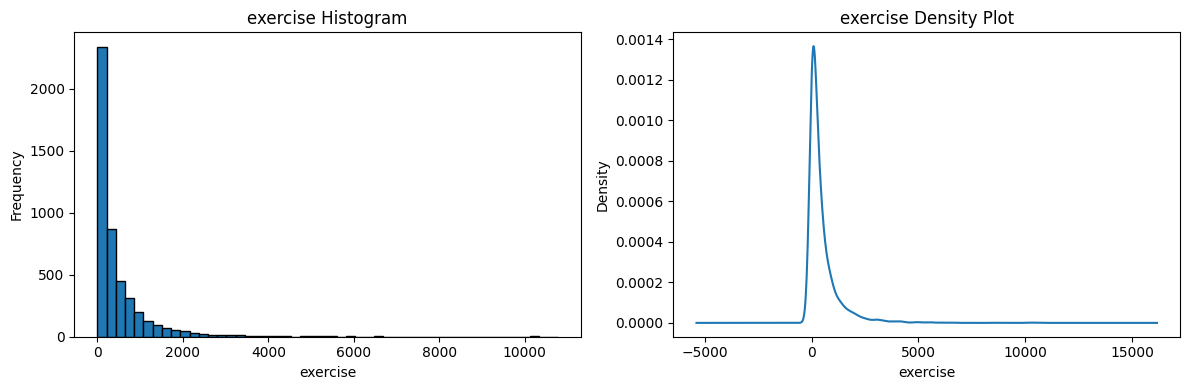

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 linha, 2 colunas

# Histograma
axes[0].hist(Quantitative['PAG_MINW'], bins=50, edgecolor='black')
axes[0].set_xlabel("exercise")
axes[0].set_ylabel("Frequency")
axes[0].set_title("exercise Histogram")

# Densidade
Quantitative['PAG_MINW'].plot(kind='density', ax=axes[1])
axes[1].set_xlabel("exercise")
axes[1].set_title("exercise Density Plot")

plt.tight_layout()
plt.show()

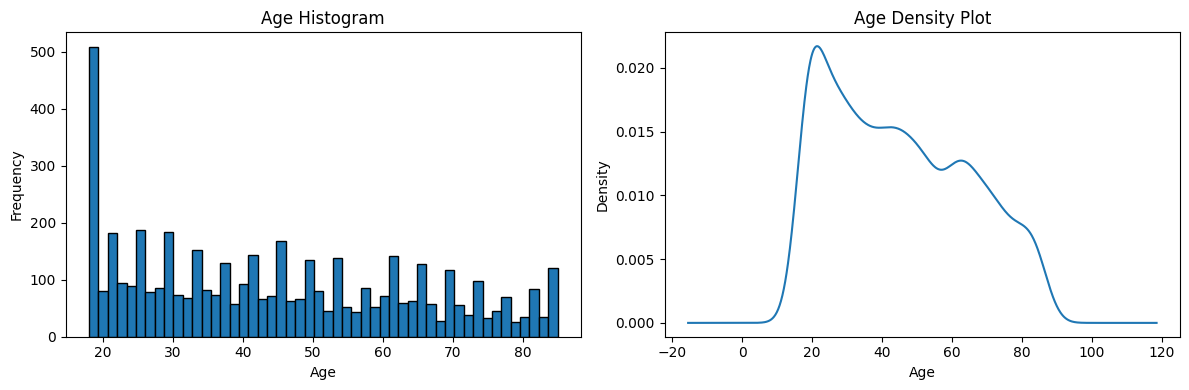

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 linha, 2 colunas

# Histograma
axes[0].hist(Quantitative['RIDAGEYR'], bins=50, edgecolor='black')
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Age Histogram")

# Densidade
Quantitative['RIDAGEYR'].plot(kind='density', ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_title("Age Density Plot")

plt.tight_layout()
plt.show()

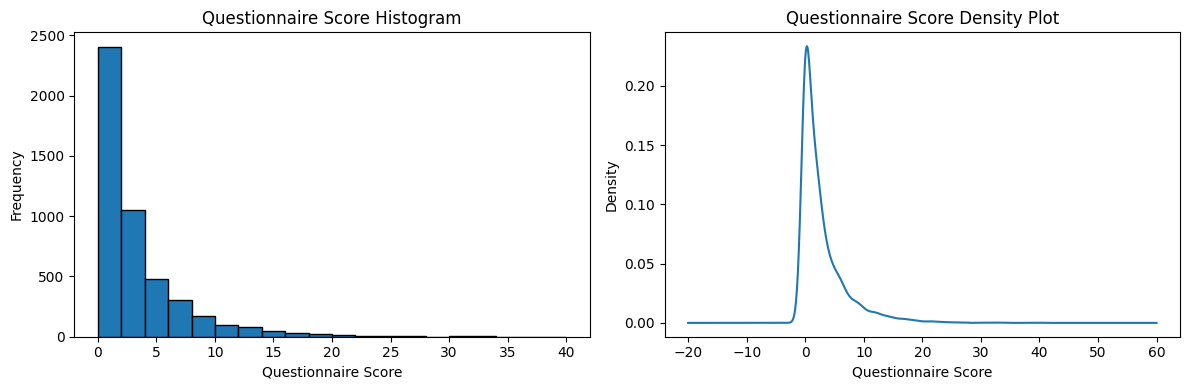

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 linha, 2 colunas

# Histograma
axes[0].hist(Quantitative['phq9'], bins=20, edgecolor='black')
axes[0].set_xlabel("Questionnaire Score")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Questionnaire Score Histogram")

# Densidade
Quantitative['phq9'].plot(kind='density', ax=axes[1])
axes[1].set_xlabel("Questionnaire Score")
axes[1].set_title("Questionnaire Score Density Plot")

plt.tight_layout()
plt.show()

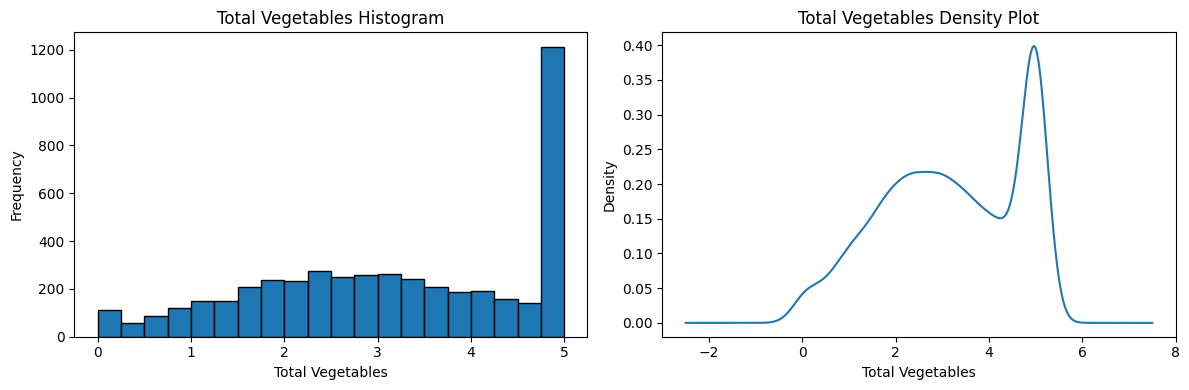

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 linha, 2 colunas

# Histograma
axes[0].hist(Quantitative['HEI2015C1_TOTALVEG'], bins=20, edgecolor='black')
axes[0].set_xlabel("Total Vegetables")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Total Vegetables Histogram")

# Densidade
Quantitative['HEI2015C1_TOTALVEG'].plot(kind='density', ax=axes[1])
axes[1].set_xlabel("Total Vegetables")
axes[1].set_title("Total Vegetables Density Plot")

plt.tight_layout()
plt.show()

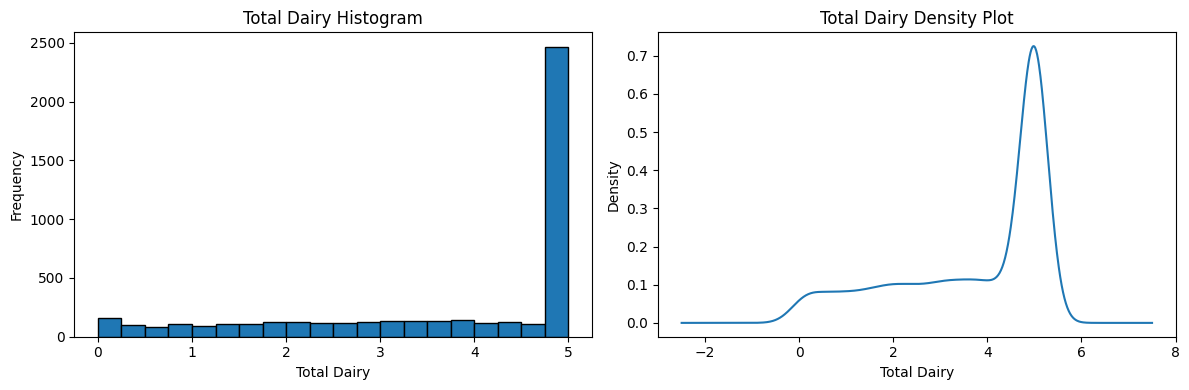

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 linha, 2 colunas

# Histograma
axes[0].hist(Quantitative['HEI2015C6_TOTALDAIRY'], bins=20, edgecolor='black')
axes[0].set_xlabel("Total Dairy")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Total Dairy Histogram")

# Densidade
Quantitative['HEI2015C6_TOTALDAIRY'].plot(kind='density', ax=axes[1])
axes[1].set_xlabel("Total Dairy")
axes[1].set_title("Total Dairy Density Plot")

plt.tight_layout()
plt.show()

* *For qualitative variables, I examined absolute and relative frequencies, and used bar charts for visualization.*

In [23]:
order = [0, 1, 2, 3, 7, 9]
labels = ["Not at all", "Several days", "More than half the days", "Nearly every day", "Refused", "Don't know"]

In [24]:
data_clean['DPQ010'].value_counts(normalize=True)*100

DPQ010
0.0    79.691788
1.0    13.806206
2.0     3.736542
3.0     2.596580
9.0     0.168883
Name: proportion, dtype: float64

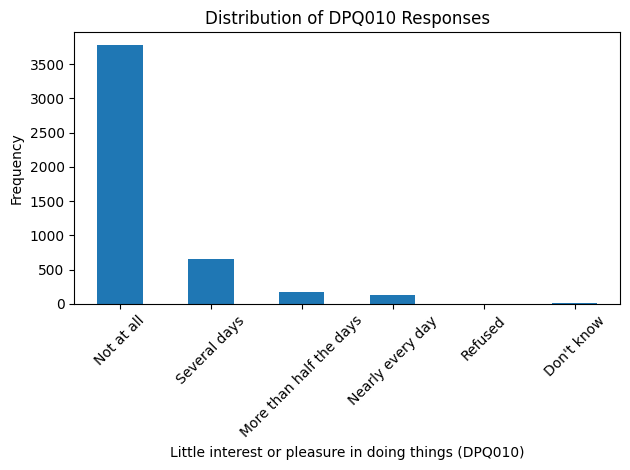

In [25]:
counts = (data_clean['DPQ010']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Little interest or pleasure in doing things (DPQ010)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ010 Responses")
plt.tight_layout()
plt.show()

In [26]:
data_clean['DPQ020'].value_counts(normalize=True)*100

DPQ020
0.0    78.045176
1.0    15.896137
2.0     3.673211
3.0     2.279924
9.0     0.105552
Name: proportion, dtype: float64

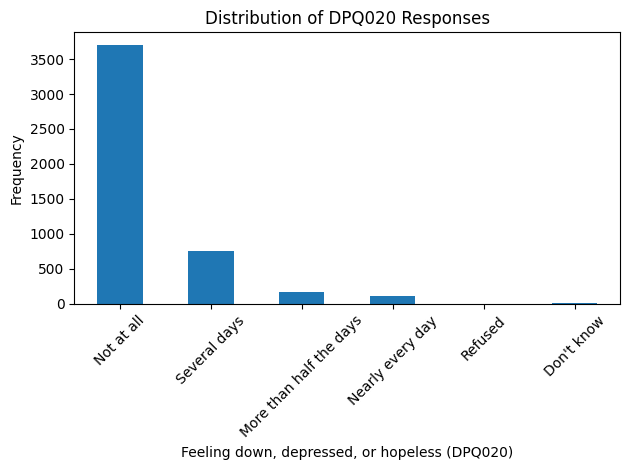

In [27]:
counts = (data_clean['DPQ020']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Feeling down, depressed, or hopeless (DPQ020)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ020 Responses")
plt.tight_layout()
plt.show()

In [28]:
data_clean['DPQ030'].value_counts(normalize=True)

DPQ030
0.0    0.652734
1.0    0.222293
3.0    0.064387
2.0    0.059320
9.0    0.001267
Name: proportion, dtype: float64

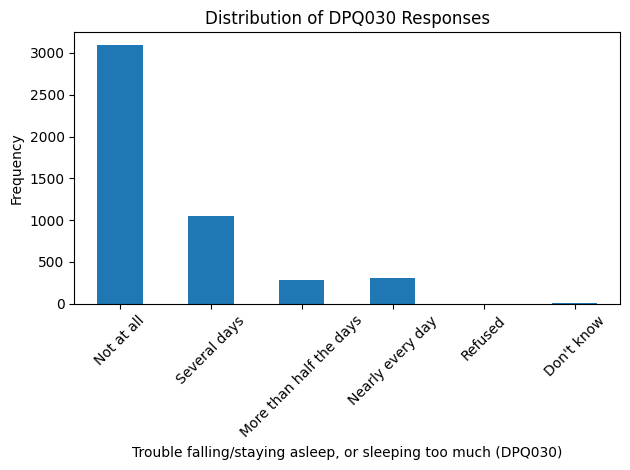

In [29]:
counts = (data_clean['DPQ030']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Trouble falling/staying asleep, or sleeping too much (DPQ030)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ030 Responses")
plt.tight_layout()
plt.show()

In [30]:
data_clean['DPQ040'].value_counts(normalize=True)*100


DPQ040
0.0    50.221659
1.0    35.444374
2.0     7.620857
3.0     6.607558
9.0     0.105552
Name: proportion, dtype: float64

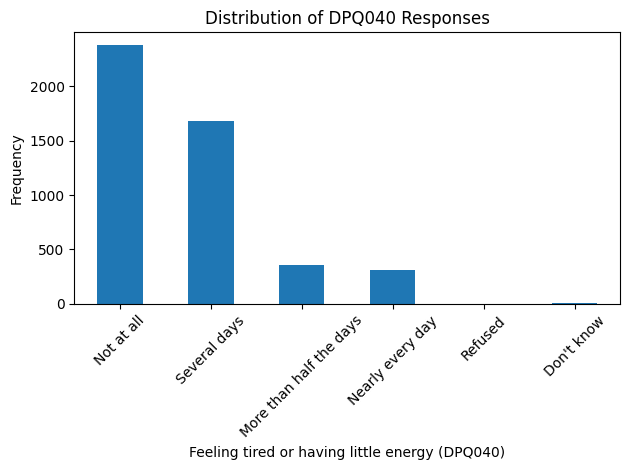

In [31]:
counts = (data_clean['DPQ040']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Feeling tired or having little energy (DPQ040)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ040 Responses")
plt.tight_layout()
plt.show()

In [32]:
data_clean['DPQ050'].value_counts(normalize=True)*100


DPQ050
0.0    78.952924
1.0    14.249525
3.0     3.398776
2.0     3.335444
9.0     0.063331
Name: proportion, dtype: float64

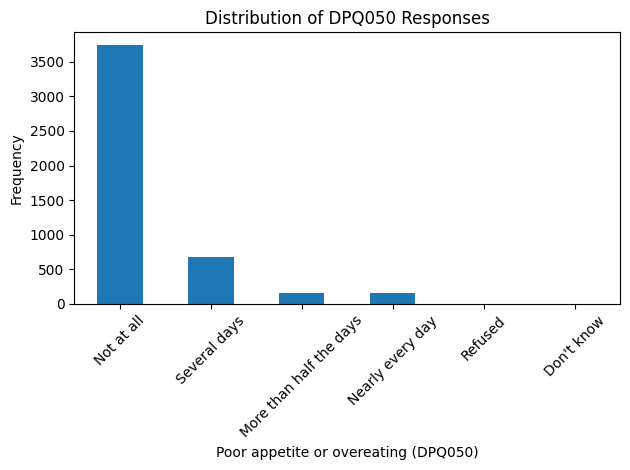

In [33]:
counts = (data_clean['DPQ050']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Poor appetite or overeating (DPQ050)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ050 Responses")
plt.tight_layout()
plt.show()

In [34]:
data_clean['DPQ060'].value_counts(normalize=True)*100


DPQ060
0.0    85.518261
1.0    10.618535
2.0     1.984378
3.0     1.794385
9.0     0.084442
Name: proportion, dtype: float64

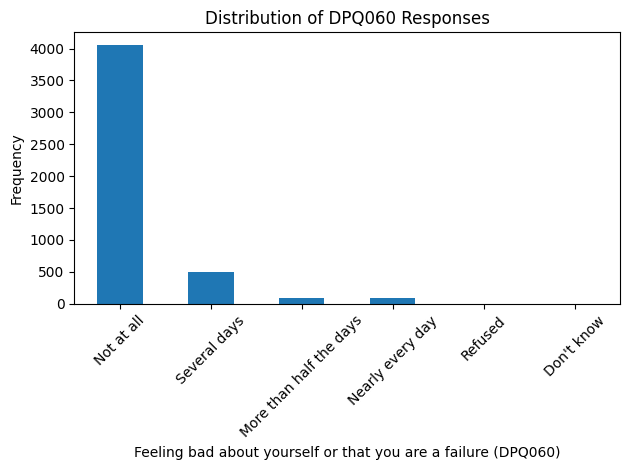

In [35]:
counts = (data_clean['DPQ060']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Feeling bad about yourself or that you are a failure (DPQ060)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ060 Responses")
plt.tight_layout()
plt.show()

In [36]:
data_clean['DPQ070'].value_counts(normalize=True)*100


DPQ070
0.0    84.314967
1.0    11.167406
2.0     2.427697
3.0     2.047710
9.0     0.042221
Name: proportion, dtype: float64

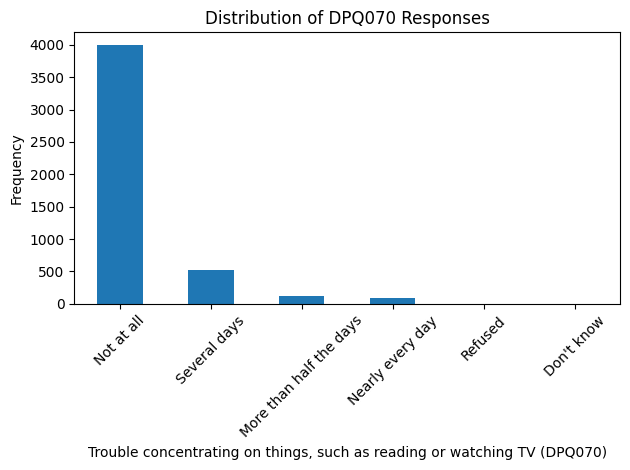

In [37]:
counts = (data_clean['DPQ070']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Trouble concentrating on things, such as reading or watching TV (DPQ070)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ070 Responses")
plt.tight_layout()
plt.show()

In [38]:
data_clean['DPQ080'].value_counts(normalize=True)*100


DPQ080
0.0    90.331433
1.0     6.881993
2.0     1.667722
3.0     0.928858
9.0     0.189994
Name: proportion, dtype: float64

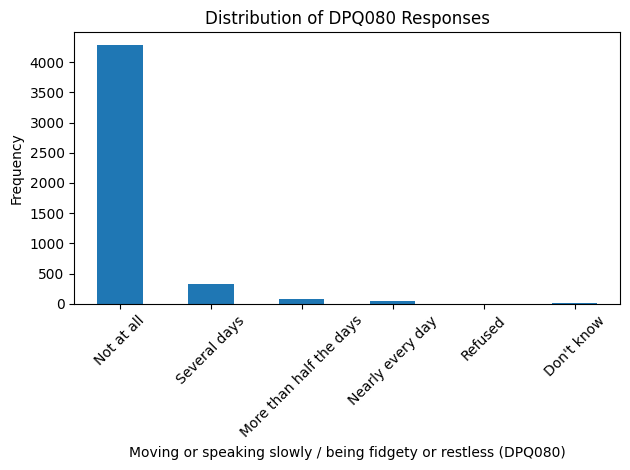

In [39]:
counts = (data_clean['DPQ080']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.xlabel("Moving or speaking slowly / being fidgety or restless (DPQ080)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ080 Responses")
plt.tight_layout()
plt.show()

In [40]:
data_clean['DPQ090'].value_counts(normalize=True)*100


DPQ090
0.0    96.495672
1.0     2.533249
2.0     0.654423
3.0     0.274435
9.0     0.042221
Name: proportion, dtype: float64

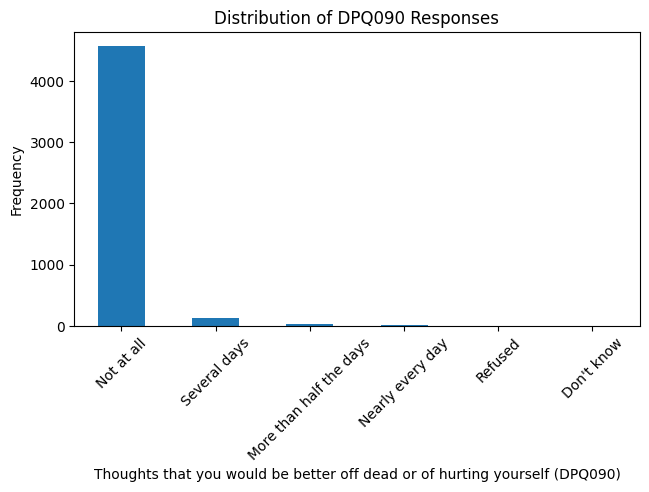

In [41]:
counts = (data_clean['DPQ090']
          .astype('Int64')
          .value_counts()
          .reindex(order, fill_value=0))

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45)

plt.tight_layout()
plt.xlabel("Thoughts that you would be better off dead or of hurting yourself (DPQ090)")
plt.ylabel("Frequency")
plt.title("Distribution of DPQ090 Responses")
plt.show()

In [42]:
data_clean['RIAGENDR'].value_counts(normalize=True)*100


RIAGENDR
2    51.868271
1    48.131729
Name: proportion, dtype: float64

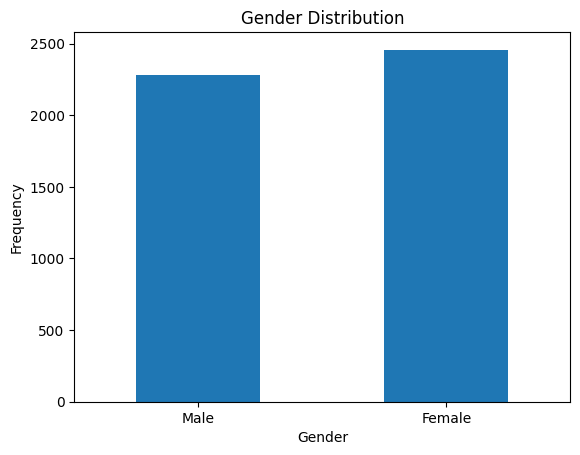

In [43]:
counts = data_clean['RIAGENDR'].value_counts().sort_index()
counts.plot(kind='bar')

plt.xticks(ticks=[0,1], labels=["Male","Female"], rotation=0)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender Distribution")
plt.show()

In [44]:
data_clean['RIDRETH1'].value_counts(normalize=True)*100


RIDRETH1
3    48.490606
4    23.580325
1    21.068187
5     3.820984
2     3.039899
Name: proportion, dtype: float64

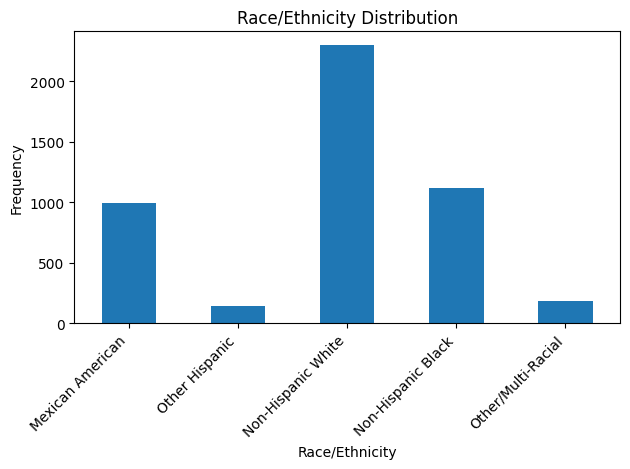

In [45]:
counts = data_clean['RIDRETH1'].value_counts().sort_index()

labels = [
    "Mexican American", 
    "Other Hispanic", 
    "Non-Hispanic White", 
    "Non-Hispanic Black", 
    "Other/Multi-Racial"
]

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.title("Race/Ethnicity Distribution")
plt.tight_layout()
plt.show()

In [46]:
data_clean['DMDEDUC'].value_counts(normalize=True)*100


DMDEDUC
4    28.477940
3    25.353599
5    18.260502
2    17.226092
1    10.660756
9     0.021110
Name: proportion, dtype: float64

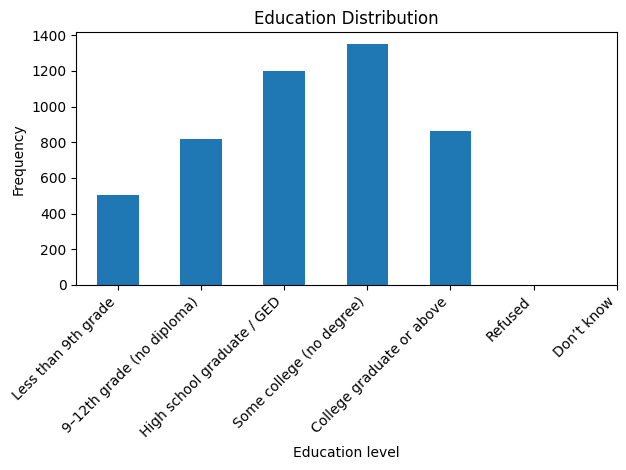

In [47]:
counts = data_clean['DMDEDUC'].value_counts().sort_index()
labels = [
    'Less than 9th grade',
    '9–12th grade (no diploma)',
    'High school graduate / GED',
    'Some college (no degree)',
    'College graduate or above',
    'Refused',
    'Don’t know'
]

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.xticks(rotation=45)
plt.xlabel("Education level")
plt.ylabel("Frequency")
plt.title("Education Distribution")
plt.tight_layout()
plt.show()

In [48]:
data_clean['INDFMINC'].value_counts(normalize=True)*100


INDFMINC
11.0    20.540426
6.0     12.835128
7.0      9.858560
8.0      9.225248
3.0      8.148617
5.0      7.726409
4.0      7.557526
9.0      5.657589
10.0     5.298712
2.0      5.277602
1.0      3.525438
99.0     1.857716
12.0     1.372176
77.0     0.569981
13.0     0.548871
Name: proportion, dtype: float64

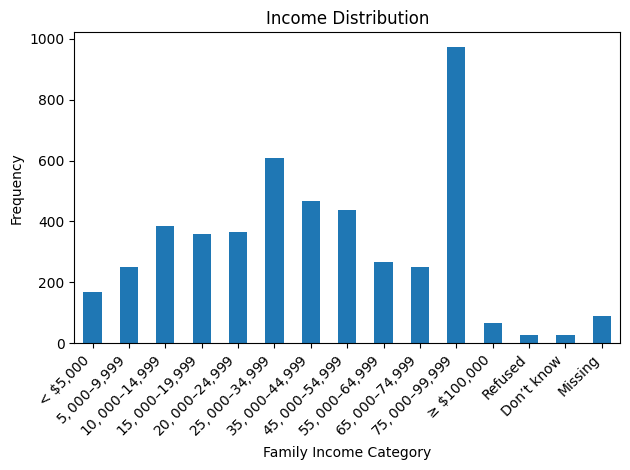

In [49]:
counts = data_clean['INDFMINC'].value_counts().sort_index()

labels = [
    '< $5,000',
    '$5,000–$9,999',
    '$10,000–$14,999',
    '$15,000–$19,999',
    '$20,000–$24,999',
    '$25,000–$34,999',
    '$35,000–$44,999',
    '$45,000–$54,999',
    '$55,000–$64,999',
    '$65,000–$74,999',
    '$75,000–$99,999',
    '≥ $100,000',
    'Refused',
    'Don’t know',
    'Missing'
]


ax = counts.plot(kind='bar')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.xlabel("Family Income Category")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.tight_layout()
plt.show()

In [50]:
data_clean['ADHERENCE'].value_counts(normalize=True)*100


ADHERENCE
3.0    42.389698
1.0    41.946380
2.0    15.663922
Name: proportion, dtype: float64

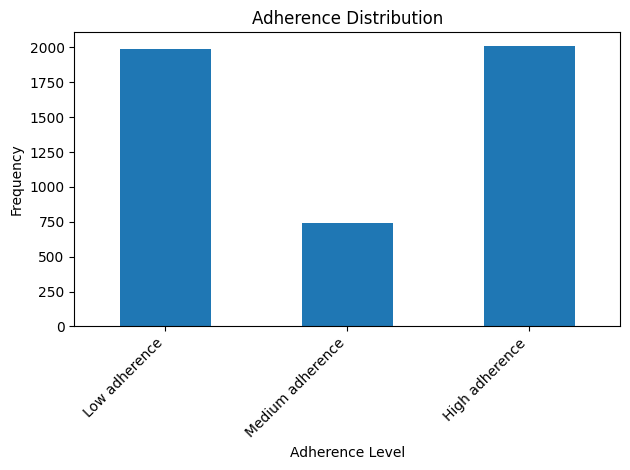

In [51]:
counts = data_clean['ADHERENCE'].value_counts().sort_index()

labels = [
    'Low adherence',
    'Medium adherence',
    'High adherence'
]

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.xlabel("Adherence Level")
plt.ylabel("Frequency")
plt.title("Adherence Distribution")
plt.tight_layout()
plt.show()

In [52]:
data_clean['phq_grp'].value_counts(normalize=True)*100


phq_grp
0    78.720709
1    14.629512
2     6.649778
Name: proportion, dtype: float64

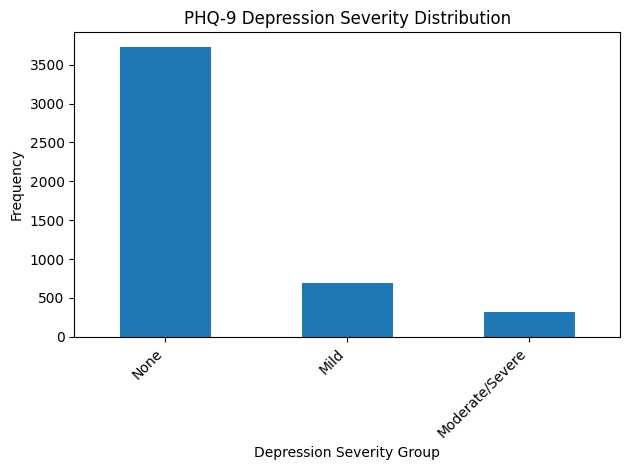

In [53]:
counts = data_clean['phq_grp'].value_counts().sort_index()

labels = [
    'None',              # 0
    'Mild',              # 1
    'Moderate/Severe'    # 2
]

ax = counts.plot(kind='bar')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.xlabel("Depression Severity Group")
plt.ylabel("Frequency")
plt.title("PHQ-9 Depression Severity Distribution")
plt.tight_layout()
plt.show()

### **Bivariate Exploratory Data Analysis (EDA)**

In [54]:
data_clean.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'phq9', 'phq_grp'],
      dtype='object')

In [55]:
Quantitative.columns

Index(['RIDAGEYR', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'phq9',
       'PAG_MINW'],
      dtype='object')

* *The scatter plot suggests a negative association: higher levels of physical activity are linked to lower PHQ-9 scores, indicating fewer depressive symptoms.*

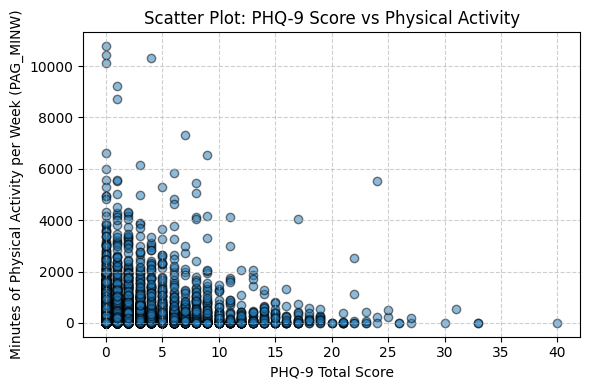

In [56]:
plt.figure(figsize=(6,4))
plt.scatter(data_clean['phq9'], data_clean['PAG_MINW'], alpha=0.5, edgecolors='k')
plt.xlabel("PHQ-9 Total Score")
plt.ylabel("Minutes of Physical Activity per Week (PAG_MINW)")
plt.title("Scatter Plot: PHQ-9 Score vs Physical Activity")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

* *The scatter plot of age versus physical activity shows no strong overall trend, although higher activity levels are more common among participants aged 18 to 40.*

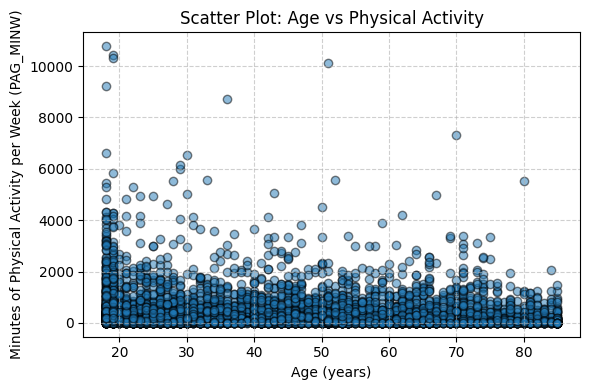

In [57]:
plt.figure(figsize=(6,4))
plt.scatter(data_clean['RIDAGEYR'], data_clean['PAG_MINW'], alpha=0.5, edgecolors='k')

plt.xlabel("Age (years)")
plt.ylabel("Minutes of Physical Activity per Week (PAG_MINW)")
plt.title("Scatter Plot: Age vs Physical Activity")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

* *There are no visible differences between genders in terms of depression severity.*

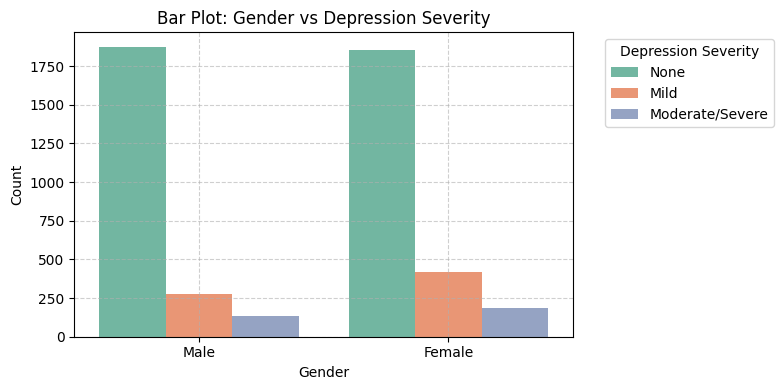

In [58]:

plt.figure(figsize=(8,4))

# Countplot com hue
sns.countplot(data=data_clean, x="RIAGENDR", hue="phq_grp", palette="Set2")

# Ajuste dos labels do eixo X (Gender)
plt.xticks(ticks=[0,1], labels=["Male","Female"], rotation=0)

# Ajuste da legenda (hue = phq_grp)
plt.legend(title="Depression Severity", labels=["None","Mild","Moderate/Severe"],
    bbox_to_anchor=(1.05, 1),   # move para fora
    loc='upper left'
)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Bar Plot: Gender vs Depression Severity")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()








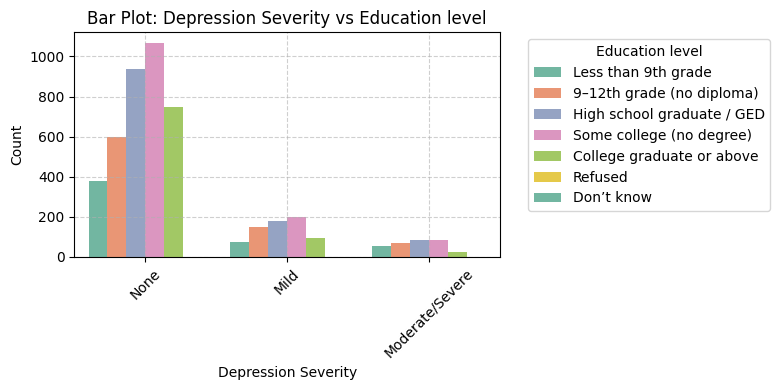

In [59]:
plt.figure(figsize=(8,4))

# Countplot com hue
sns.countplot(data=data_clean, x="phq_grp", hue="DMDEDUC", palette="Set2")

# Ajuste dos labels do eixo X (Gender)
plt.xticks(ticks=[0,1,2], labels=["None","Mild","Moderate/Severe"], rotation=45)

# Ajuste da legenda (hue = phq_grp)
plt.legend(title="Education level", labels=[
    'Less than 9th grade',
    '9–12th grade (no diploma)',
    'High school graduate / GED',
    'Some college (no degree)',
    'College graduate or above',
    'Refused',
    'Don’t know'],
    bbox_to_anchor=(1.05, 1),   # move para fora
    loc='upper left'
)

plt.xlabel("Depression Severity")
plt.ylabel("Count")
plt.title("Bar Plot: Depression Severity vs Education level")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




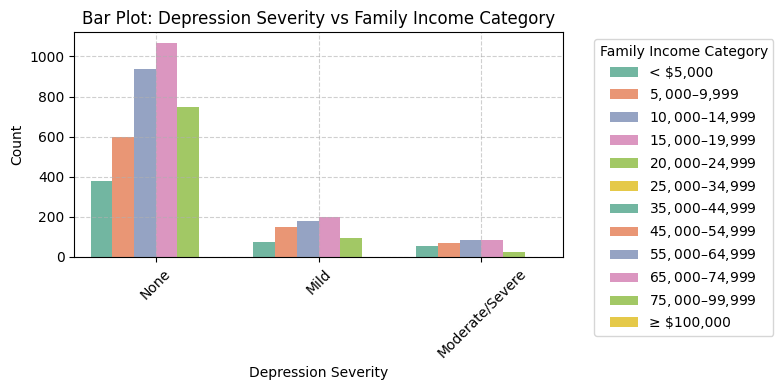

In [60]:
plt.figure(figsize=(8,4))

# Countplot com hue
sns.countplot(data=data_clean, x="phq_grp", hue="DMDEDUC", palette="Set2")

# Ajuste dos labels do eixo X (Gender)
plt.xticks(ticks=[0,1,2], labels=["None","Mild","Moderate/Severe"], rotation=45)

# Ajuste da legenda (hue = phq_grp)
plt.legend(title="Family Income Category", labels=[
    '< $5,000',
    '$5,000–$9,999',
    '$10,000–$14,999',
    '$15,000–$19,999',
    '$20,000–$24,999',
    '$25,000–$34,999',
    '$35,000–$44,999',
    '$45,000–$54,999',
    '$55,000–$64,999',
    '$65,000–$74,999',
    '$75,000–$99,999',
    '≥ $100,000',
    'Refused',
    'Don’t know',
    'Missing'],
    bbox_to_anchor=(1.05, 1),   # move para fora
    loc='upper left'
)

plt.xlabel("Depression Severity")
plt.ylabel("Count")
plt.title("Bar Plot: Depression Severity vs Family Income Category")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


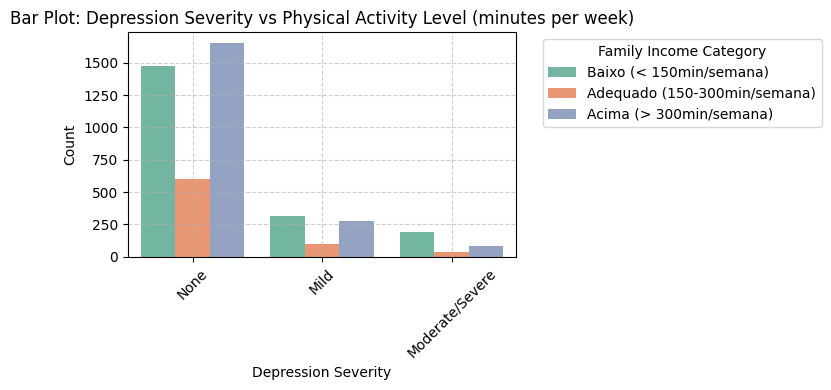

In [61]:
plt.figure(figsize=(8,4))

# Countplot com hue
sns.countplot(data=data_clean, x="phq_grp", hue="ADHERENCE", palette="Set2")

# Ajuste dos labels do eixo X (Gender)
plt.xticks(ticks=[0,1,2], labels=["None","Mild","Moderate/Severe"], rotation=45)

# Ajuste da legenda (hue = phq_grp)
plt.legend(title="Family Income Category", labels=[
'Baixo (< 150min/semana)',
'Adequado (150-300min/semana)',
'Acima (> 300min/semana)'],
    bbox_to_anchor=(1.05, 1),   # move para fora
    loc='upper left'
)

plt.xlabel("Depression Severity")
plt.ylabel("Count")
plt.title("Bar Plot: Depression Severity vs Physical Activity Level (minutes per week)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Will plot boxplots for: ['RIDAGEYR', 'INDFMINC', 'PAG_MINW', 'HEI2015C1_TOTALVEG', 'HEI2015_TOTAL_SCORE']


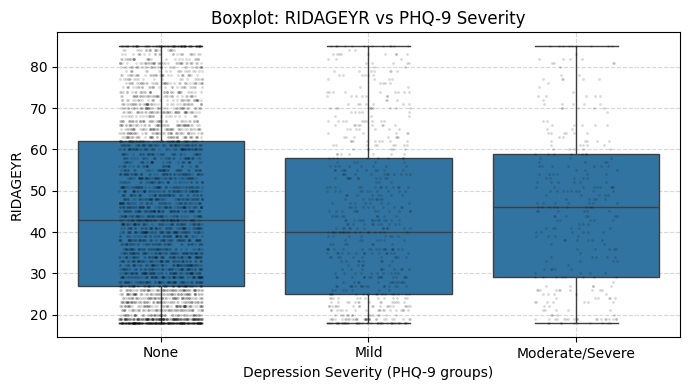

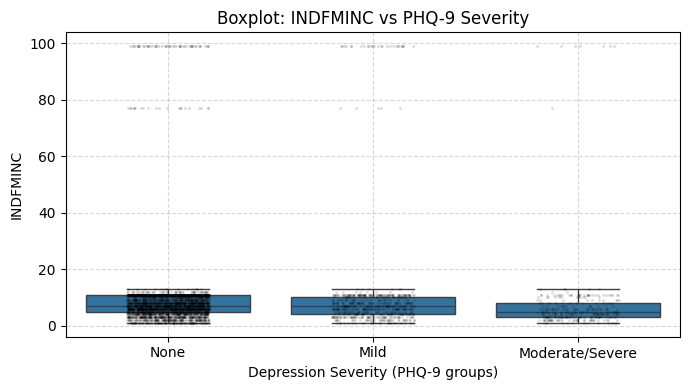

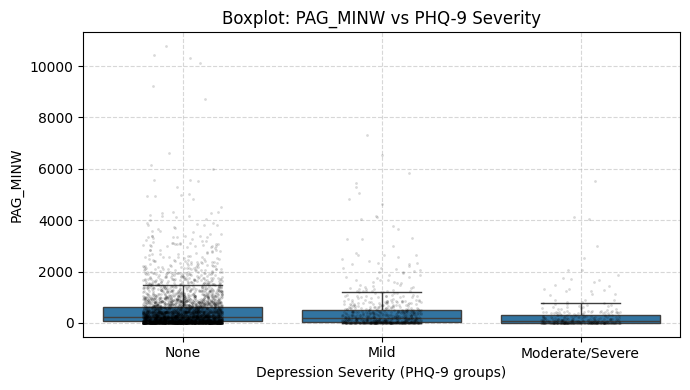

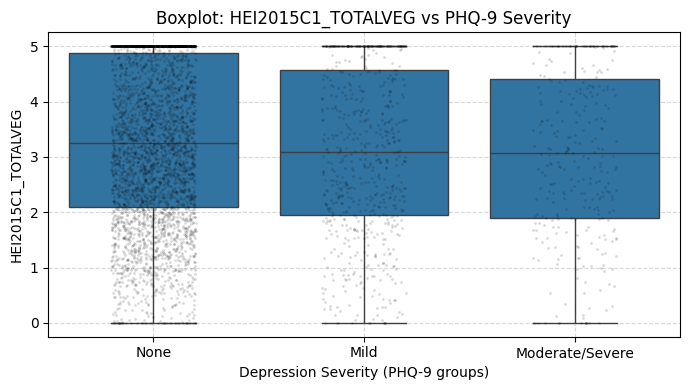

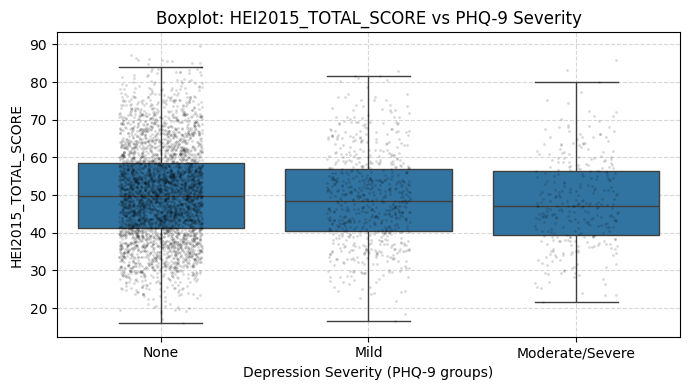

In [62]:
dpq_cols = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050',
            'DPQ060','DPQ070','DPQ080','DPQ090', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG']

cols_to_exclude = set(['SEQN', 'phq_grp', 'phq9'] + dpq_cols)

# numéricas candidatas
numeric_cols = data_clean.select_dtypes(include=['number']).columns

# heurstica: mantém contínuas (>=10 valores únicos) e remove excluídas
cont_vars = [c for c in numeric_cols
             if c not in cols_to_exclude and data_clean[c].nunique(dropna=True) >= 10]

print("Will plot boxplots for:", cont_vars)

# labels do eixo X
phq_labels = ["None", "Mild", "Moderate/Severe"]

for col in cont_vars:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=data_clean, x="phq_grp", y=col, showfliers=False)
    # opcional: pontos sobrepostos (leve)
    sns.stripplot(data=data_clean, x="phq_grp", y=col, color='k', alpha=0.15, jitter=0.2, size=2)

    # eixos/título
    plt.xticks(ticks=[0,1,2], labels=phq_labels, rotation=0)
    plt.xlabel("Depression Severity (PHQ-9 groups)")
    plt.ylabel(col)
    plt.title(f"Boxplot: {col} vs PHQ-9 Severity")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

### **Hypothesis Testing**

* **To evaluate the relationship between two numerical variables, use the Pearson correlation test.**



In [63]:
Quantitative.columns

Index(['RIDAGEYR', 'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'phq9',
       'PAG_MINW'],
      dtype='object')

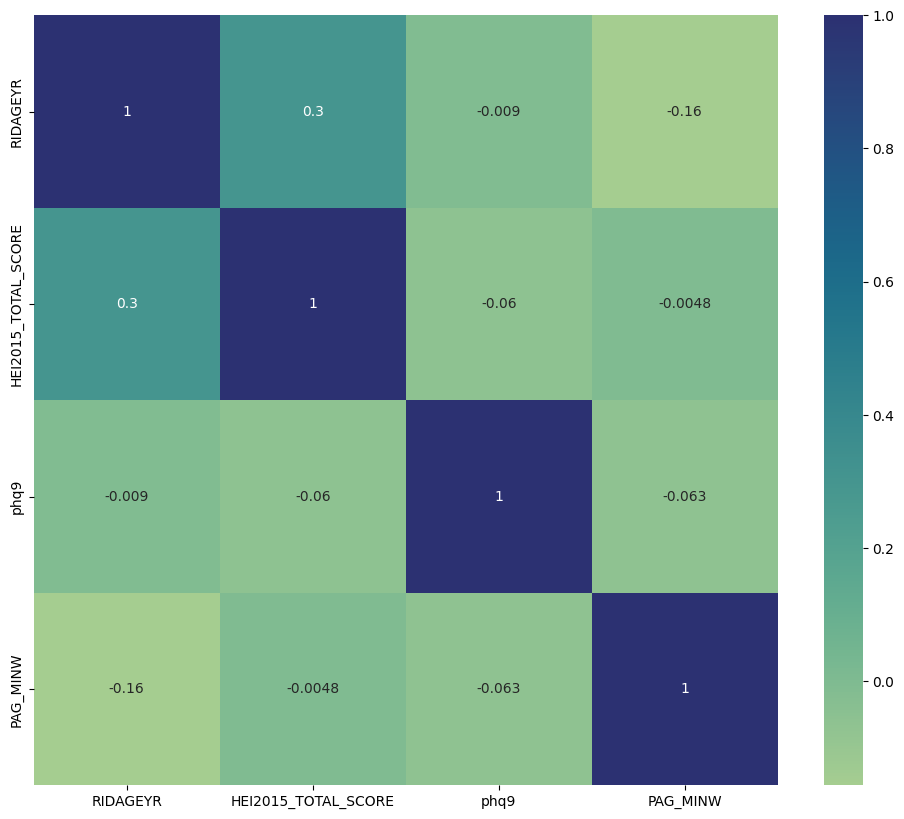

In [64]:
corr = Quantitative[['RIDAGEYR', 'HEI2015_TOTAL_SCORE', 'phq9',
       'PAG_MINW']].corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, annot=True, cmap="crest") 
plt.show()

* *The correlation matrix shows that none of the quantitative variables (age, diet quality, physical activity) are strongly correlated with depression severity (phq9).*
* *Age is moderately correlated with diet quality (r ≈ 0.3), suggesting older participants may have healthier eating patterns.*
* *Age also has a weak negative correlation with physical activity (r ≈ –0.16), meaning that physical activity tends to decrease with age.*

#### To evaluate the association between two categorical variables, use the Chi-square test of independence



* **Depression Severity vs Physical Activity Level (minutes per week)**

In [65]:
from scipy.stats import chi2_contingency

In [66]:
contingency_table = pd.crosstab(data_clean['ADHERENCE'], data_clean['phq_grp'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies under H0:")
print(expected)
print('the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.')

Chi-square = 62.3059
p-value = 0.0000
Degrees of freedom = 4
Expected frequencies under H0:
[[1564.18049398  290.68841039  132.13109563]
 [ 584.10766308  108.55098163   49.34135529]
 [1580.71184294  293.76060798  133.52754908]]
the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.


*"The Chi-square test revealed a significant association between adherence to physical activity and depression severity (χ² = 62.31, df = 4, p < 0.001). This suggests that levels of physical activity adherence are related to the severity of depressive symptoms."*

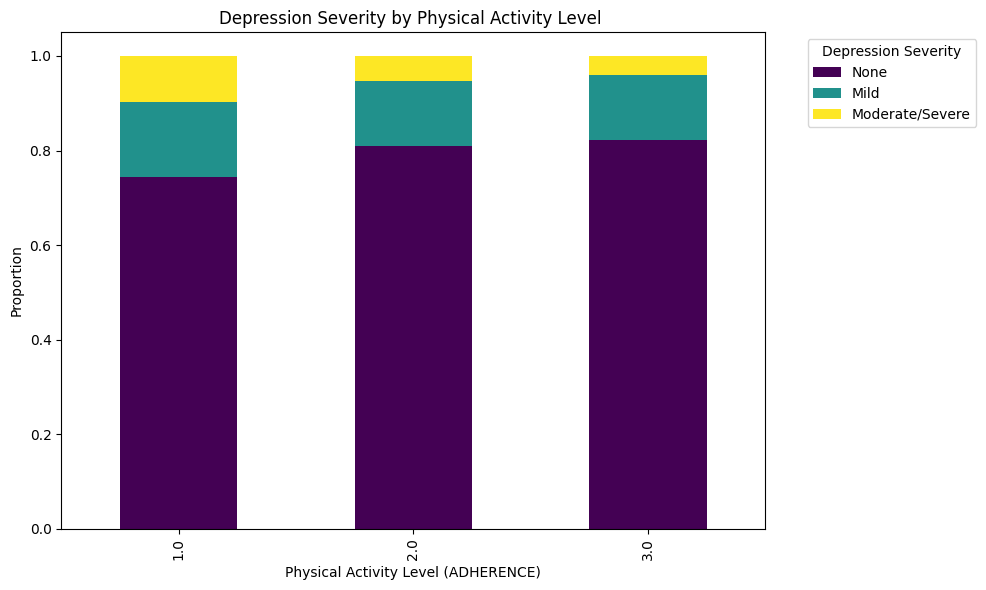

In [67]:
# Normalize to get proportions (row percentages)
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot
contingency_table_norm.plot(
    kind="bar", stacked=True, figsize=(10,6), colormap="viridis"
)

plt.xlabel("Physical Activity Level (ADHERENCE)")
plt.ylabel("Proportion")
plt.title("Depression Severity by Physical Activity Level ")
plt.legend(
    title="Depression Severity",
    labels=["None", "Mild", "Moderate/Severe"],
    bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.tight_layout()
plt.show()

* **Depression Severity vs Family Income Category**

In [68]:
contingency_table_1 = pd.crosstab(data_clean['INDFMINC'], data_clean['phq_grp'])

chi2, p, dof, expected = chi2_contingency(contingency_table_1)

print(f"Chi-square = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies under H0:")
print(expected)
print('the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.')

Chi-square = 170.9488
p-value = 0.0000
Degrees of freedom = 28
Expected frequencies under H0:
[[131.46358455  24.43128562  11.10512983]
 [196.80177327  36.57378087  16.62444585]
 [303.86193794  56.46991767  25.6681444 ]
 [281.82013933  52.37365421  23.80620646]
 [288.11779607  53.5440152   24.33818873]
 [478.6219126   88.94743509  40.43065231]
 [367.62571248  68.31982267  31.05446485]
 [344.00949968  63.93096897  29.05953135]
 [210.97150095  39.2070931   17.82140595]
 [197.58898037  36.720076    16.69094364]
 [765.95250158 142.34515516  64.70234326]
 [ 51.16846105   9.50918303   4.32235592]
 [ 20.46738442   3.80367321   1.72894237]
 [ 21.25459151   3.94996833   1.79544015]
 [ 69.27422419  12.87397087   5.85180494]]
the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.


*The Chi-square test revealed a statistically significant association between family income level (INDFMINC) and depression severity (phq_grp) (χ² = 170.95, df = 28, p < 0.001). This indicates that depression symptoms are not evenly distributed across income groups. Lower-income categories tend to have higher proportions of moderate/severe depression, while higher-income categories show lower prevalence of symptoms.*

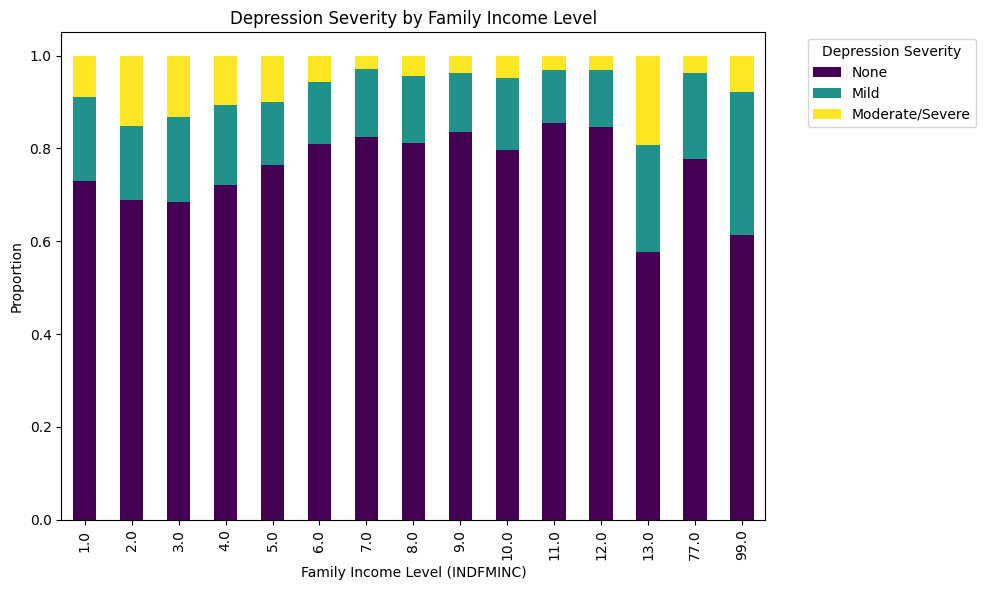

In [69]:

# Normalize to get proportions (row percentages)
contingency_table_norm_1 = contingency_table_1.div(contingency_table_1.sum(axis=1), axis=0)

# Plot
contingency_table_norm_1.plot(
    kind="bar", stacked=True, figsize=(10,6), colormap="viridis"
)

plt.xlabel("Family Income Level (INDFMINC)")
plt.ylabel("Proportion")
plt.title("Depression Severity by Family Income Level")
plt.legend(
    title="Depression Severity",
    labels=["None", "Mild", "Moderate/Severe"],
    bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.tight_layout()
plt.show()

* **Depression Severity vs Education level**

In [70]:
contingency_table_2 = pd.crosstab(data_clean['DMDEDUC'], data_clean['phq_grp'])

chi2, p, dof, expected = chi2_contingency(contingency_table_2)

print(f"Chi-square = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies under H0:")
print(expected)
print('the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.')

Chi-square = 67.9550
p-value = 0.0000
Degrees of freedom = 10
Expected frequencies under H0:
[[3.97539582e+02 7.38790374e+01 3.35813806e+01]
 [6.42360988e+02 1.19376821e+02 5.42621913e+01]
 [9.45435719e+02 1.75700443e+02 7.98638379e+01]
 [1.06194237e+03 1.97352122e+02 8.97055098e+01]
 [6.80934136e+02 1.26545282e+02 5.75205826e+01]
 [7.87207093e-01 1.46295123e-01 6.64977834e-02]]
the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.


*The Chi-square test revealed a statistically significant association between Education level (DMDEDUC) and depression severity (phq_grp) (χ² = 67.96, df = 10, p < 0.001). This indicates that depressive symptoms are not evenly distributed across education groups. Lower-education categories tend to show higher proportions of moderate/severe depression, while higher-education groups present lower prevalence of symptoms.*

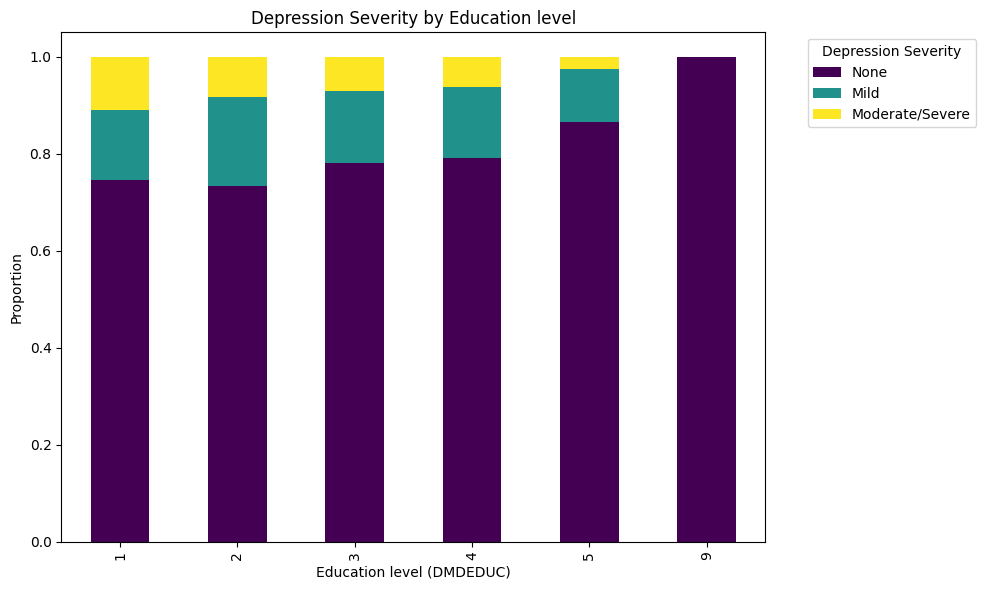

In [71]:

# Normalize to get proportions (row percentages)
contingency_table_norm_2 = contingency_table_2.div(contingency_table_2.sum(axis=1), axis=0)

# Plot
contingency_table_norm_2.plot(
    kind="bar", stacked=True, figsize=(10,6), colormap="viridis"
)

plt.xlabel("Education level (DMDEDUC)")
plt.ylabel("Proportion")
plt.title("Depression Severity by Education level")
plt.legend(
    title="Depression Severity",
    labels=["None", "Mild", "Moderate/Severe"],
    bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.tight_layout()
plt.show()

* **Gender vs Depression Severity**

In [72]:
contingency_table_3 = pd.crosstab(data_clean['RIAGENDR'], data_clean['phq_grp'])

chi2, p, dof, expected = chi2_contingency(contingency_table_3)

print(f"Chi-square = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies under H0:")
print(expected)
print('the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.')

Chi-square = 31.9531
p-value = 0.0000
Degrees of freedom = 2
Expected frequencies under H0:
[[1794.83217226  333.55288157  151.61494617]
 [1934.16782774  359.44711843  163.38505383]]
the p-value is extremely small, you can reject the null hypothesis (H₀) of independence.


*The Chi-square test revealed a statistically significant association between Gender (RIAGENDR) and depression severity (phq_grp) (χ² = 31.95, df = 2, p < 0.001). This indicates that depressive symptoms are not evenly distributed across gender groups. Women show a higher prevalence of moderate/severe symptoms compared to men.*

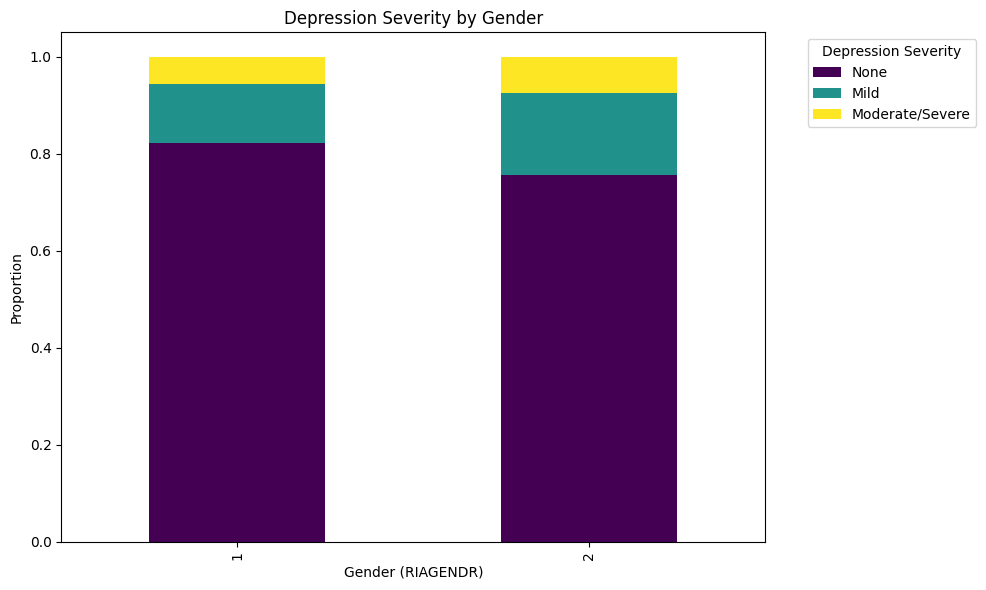

In [73]:
# Normalize to get proportions (row percentages)
contingency_table_norm_3 = contingency_table_3.div(contingency_table_3.sum(axis=1), axis=0)

# Plot
contingency_table_norm_3.plot(
    kind="bar", stacked=True, figsize=(10,6), colormap="viridis"
)

plt.xlabel("Gender (RIAGENDR)")
plt.ylabel("Proportion")
plt.title("Depression Severity by Gender")
plt.legend(
    title="Depression Severity",
    labels=["None", "Mild", "Moderate/Severe"],
    bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.tight_layout()
plt.show()




* **To compare the means of two independent groups, use the Independent t-test.**


In [74]:
from scipy import stats

In [75]:
# Grupo 1 = homens (RIAGENDR == 1)
male = data_clean.loc[data_clean["RIAGENDR"] == 1, "phq9"]

# Grupo 2 = mulheres (RIAGENDR == 2)
female = data_clean.loc[data_clean["RIAGENDR"] == 2, "phq9"]

# T-test independente
t_stat, p_value = stats.ttest_ind(male, female, nan_policy="omit")

print(f"Independent t-test = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")
print('The Independent t-test showed a statistically significant difference in depression scores (PHQ-9) between males and females ')
print('(t = -6.71, p < 0.001). This indicates that the mean level of depressive symptoms differs by gender.')


Independent t-test = -6.7142
p-value = 0.0000
The Independent t-test showed a statistically significant difference in depression scores (PHQ-9) between males and females 
(t = -6.71, p < 0.001). This indicates that the mean level of depressive symptoms differs by gender.


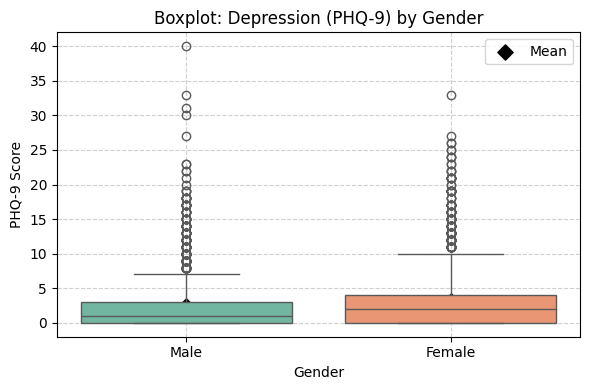

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data_clean, x="RIAGENDR", y="phq9", palette="Set2")

# Adiciona as médias como pontos pretos
means = data_clean.groupby("RIAGENDR")["phq9"].mean()
plt.scatter([0,1], means, color="black", marker="D", s=60, label="Mean")

# Ajustando labels
plt.xticks([0,1], ["Male", "Female"])
plt.xlabel("Gender")
plt.ylabel("PHQ-9 Score")
plt.title("Boxplot: Depression (PHQ-9) by Gender")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


* **To compare the means of more than two independent groups, use the F-test (ANOVA).**

In [79]:
from scipy.stats import f_oneway

groups = [data_clean.loc[data_clean["DMDEDUC"] == g, "phq9"] for g in data_clean["DMDEDUC"].unique()]

# ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic = {f_stat:.4f}")
print(f"p-value = {p_value:.4f}")

ANOVA F-statistic = 11.2436
p-value = 0.0000


*The ANOVA test revealed a statistically significant difference in mean PHQ-9 scores across education levels (F = 11.24, p < 0.001). This indicates that at least one education group differs in average depression symptoms compared to the others.*

In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD test
tukey = pairwise_tukeyhsd(
    endog=data_clean['phq9'],      # variável numérica
    groups=data_clean['DMDEDUC'],  # variável categórica
    alpha=0.05                     # nível de significância
)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -0.1673 0.9757  -0.8041  0.4696  False
     1      3  -0.5372 0.1056  -1.1338  0.0593  False
     1      4  -0.6847 0.0114  -1.2715  -0.098   True
     1      5  -1.3778    0.0  -2.0077  -0.748   True
     1      9  -2.4356 0.9899 -13.6943   8.823  False
     2      3    -0.37 0.3049  -0.8802  0.1403  False
     2      4  -0.5175 0.0368  -1.0163 -0.0186   True
     2      5  -1.2106    0.0  -1.7595 -0.6617   True
     2      9  -2.2684 0.9927 -13.5228   8.986  False
     3      4  -0.1475 0.9355  -0.5937  0.2987  False
     3      5  -0.8406    0.0  -1.3422  -0.339   True
     3      9  -1.8984 0.9968 -13.1506  9.3538  False
     4      5  -0.6931 0.0008  -1.1831 -0.2032   True
     4      9  -1.7509 0.9978 -13.0026  9.5008  False
     5      9  -1.0578 0.9998 -12.3118 10.1962  False
----------------------------

* **Significant differences (reject = True):**
    * Group 1 (Less than 9th grade) vs Group 4 (Some college)
    * Group 1 vs Group 5 (College graduate or above)
    * Group 2 (9–12th grade, no diploma) vs Group 4
    * Group 2 vs Group 5
    * Group 3 (High school graduate) vs Group 5
    * Group 4 (Some college) vs Group 5

* **Not significant (reject = False):**
    * Comparisons involving group 9 (Don’t know) → amostra muito pequena.
    * Small differences between neighboring levels (e.g., 1 vs 2, 2 vs 3, 3 vs 4).

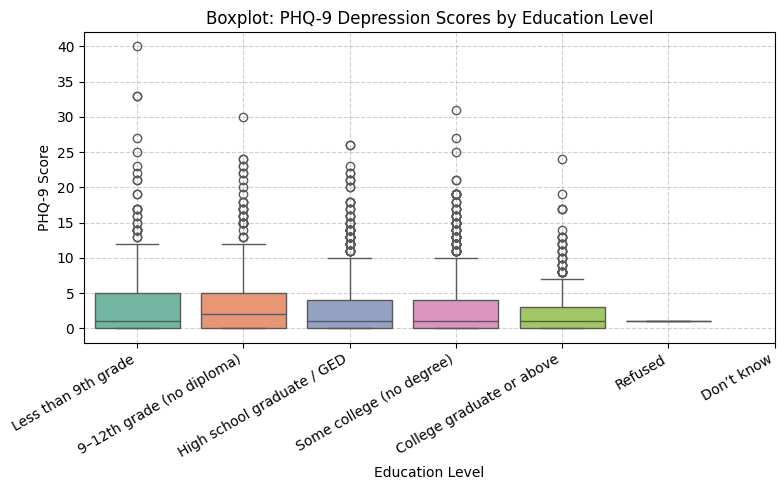

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data_clean, x="DMDEDUC", y="phq9", palette="Set2")

# Ajustando rótulos do eixo X com nomes mais claros
labels = [
    'Less than 9th grade',
    '9–12th grade (no diploma)',
    'High school graduate / GED',
    'Some college (no degree)',
    'College graduate or above',
    'Refused',
    'Don’t know'
]

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=30, ha="right")

plt.xlabel("Education Level")
plt.ylabel("PHQ-9 Score")
plt.title("Boxplot: PHQ-9 Depression Scores by Education Level")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

*The Tukey HSD post-hoc test revealed that depression scores (PHQ-9) significantly differ across several education levels. Specifically, participants with lower education (Less than 9th grade or 9–12th grade without a diploma) reported significantly higher depression scores compared to those with higher education (College graduate or above). Differences between intermediate groups (e.g., High school vs. Some college) were mostly non-significant. Overall, the results suggest that higher education is associated with lower average depression scores.*

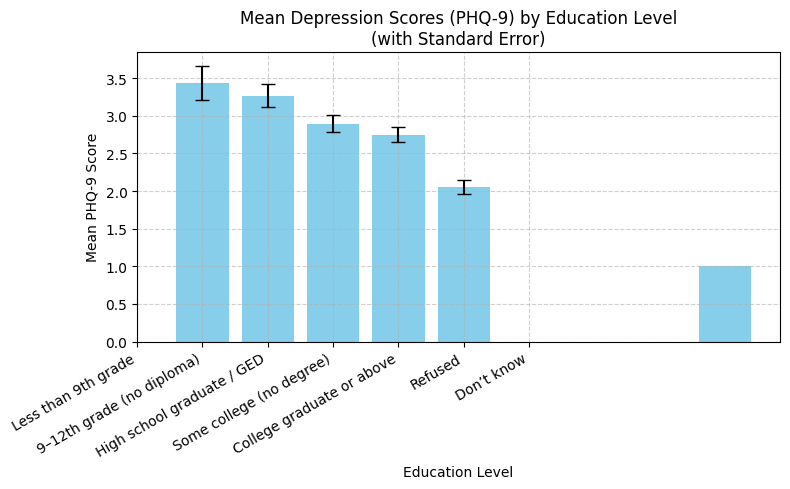

In [82]:
edu_stats = data_clean.groupby("DMDEDUC")["phq9"].agg(["mean", "count", "std"])
edu_stats["se"] = edu_stats["std"] / edu_stats["count"]**0.5  # erro padrão

plt.figure(figsize=(8,5))
plt.bar(edu_stats.index, edu_stats["mean"], yerr=edu_stats["se"], capsize=5, color="skyblue")

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=30, ha="right")
plt.xlabel("Education Level")
plt.ylabel("Mean PHQ-9 Score")
plt.title("Mean Depression Scores (PHQ-9) by Education Level\n(with Standard Error)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

*The mean PHQ-9 scores vary significantly across education levels (ANOVA, F = 11.24, p < 0.001). The Tukey post-hoc test confirmed that participants with lower education (Less than 9th grade, 9–12th grade without a diploma, and High school graduate) reported significantly higher depression scores compared to those with higher education (College graduate or above). The bar chart with standard errors illustrates this trend: depression severity decreases as education level increases, highlighting education as a potential protective factor against depressive symptoms.*

In [83]:
data_clean.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'phq9', 'phq_grp'],
      dtype='object')

data